<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [26]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




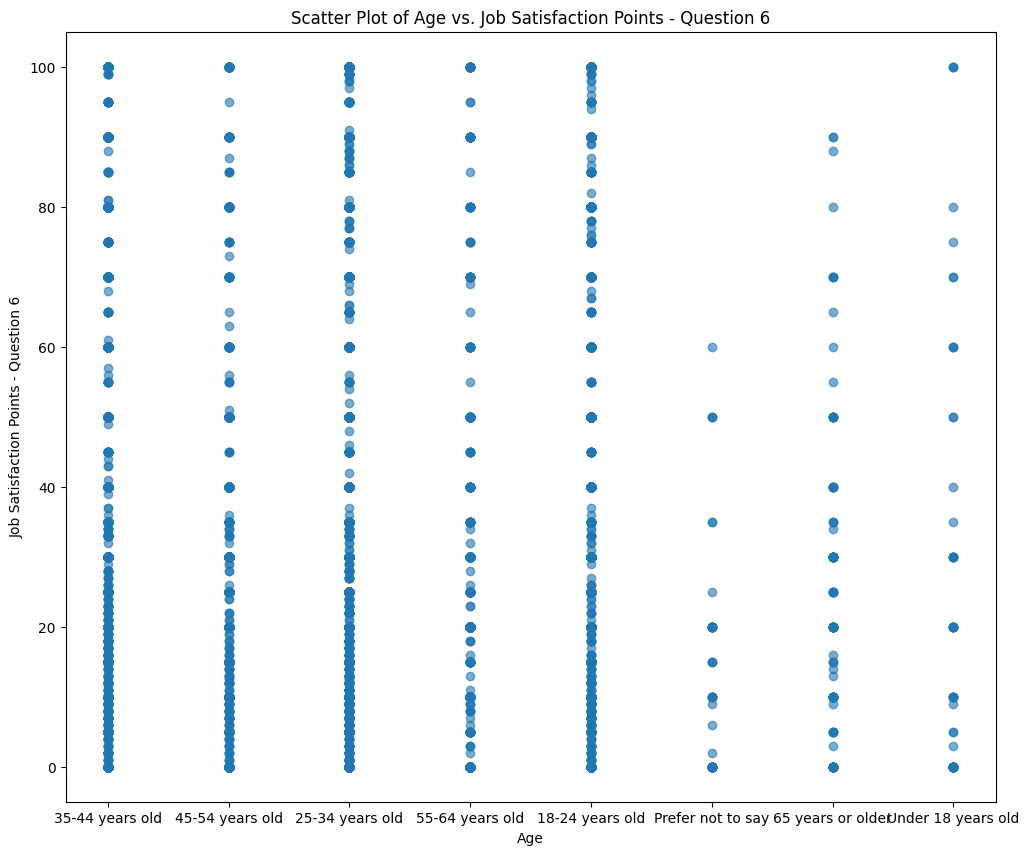

In [3]:
df_filtered = df[['Age','JobSatPoints_6']].dropna() 

plt.figure(figsize = (12,10)) 
plt.scatter(df_filtered['Age'], df_filtered['JobSatPoints_6'], alpha = 0.6) 

plt.xlabel("Age") 
plt.ylabel("Job Satisfaction Points - Question 6") 
plt.title("Scatter Plot of Age vs. Job Satisfaction Points - Question 6") 
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


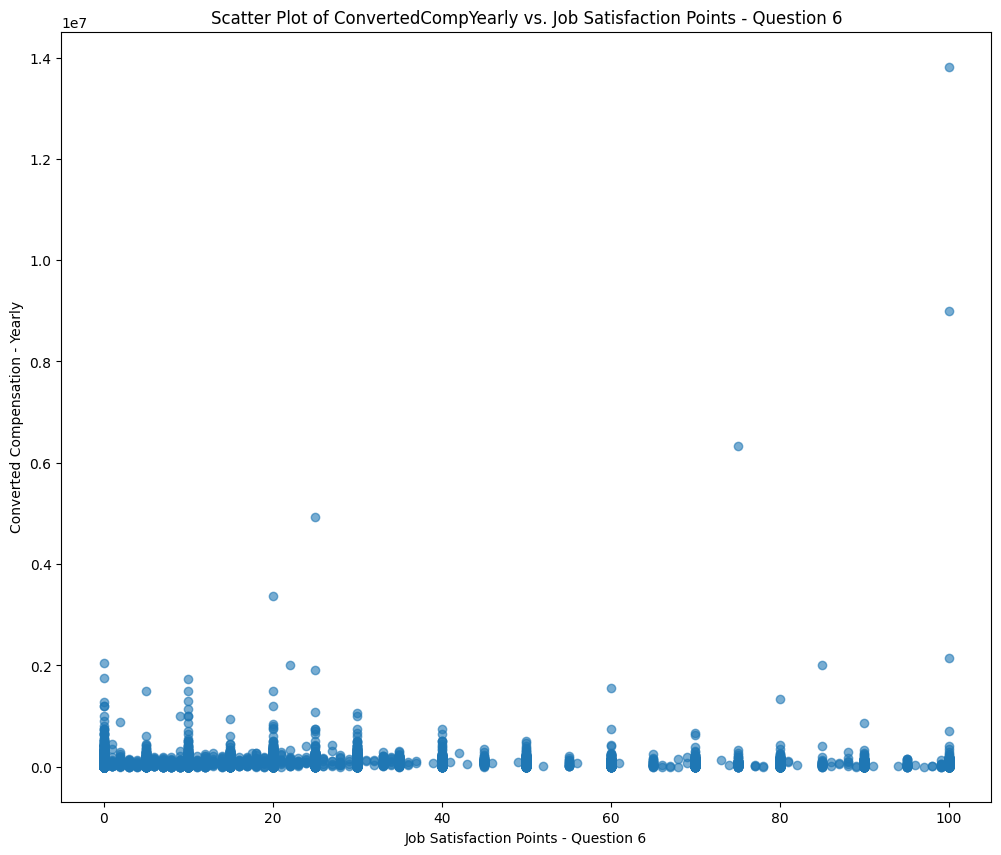

In [6]:
df_filtered_1 = df[['ConvertedCompYearly','JobSatPoints_6']].dropna() 

plt.figure(figsize = (12,10)) 
plt.scatter(df_filtered_1['JobSatPoints_6'], df_filtered_1['ConvertedCompYearly'], alpha = 0.6) 

plt.xlabel("Job Satisfaction Points - Question 6") 
plt.ylabel("Converted Compensation - Yearly") 
plt.title("Scatter Plot of ConvertedCompYearly vs. Job Satisfaction Points - Question 6") 
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


/tmp/ipykernel_2520/579535766.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age_Numeric'].fillna(df['Age_Numeric'].median(), inplace = True)


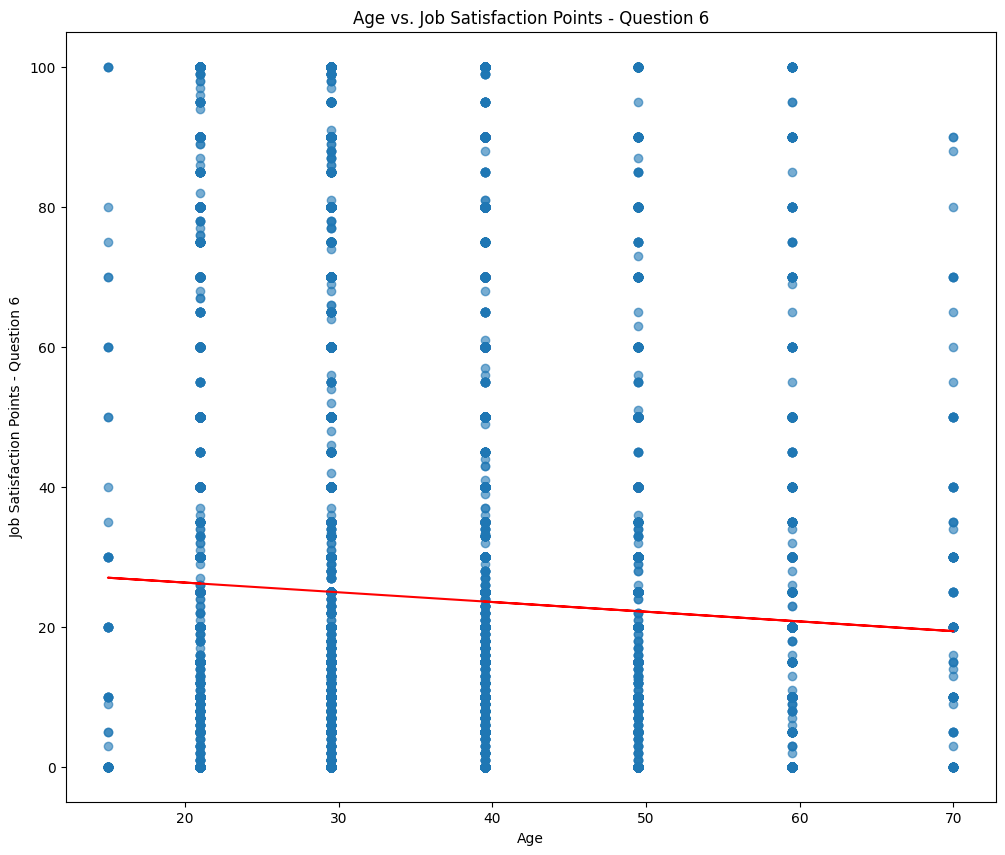

In [9]:
!pip install numpy 

import numpy as np

age_mapping = {
    "Under 18 years old": 15,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70,
    "Prefer not to say": None
}

df['Age_Numeric'] = df['Age'].map(age_mapping) 

df['Age_Numeric'].fillna(df['Age_Numeric'].median(), inplace = True)

df_filtered_2 = df[['Age_Numeric', 'JobSatPoints_6']].dropna() 

plt.figure(figsize = (12,10)) 
plt.scatter(df_filtered_2['Age_Numeric'], df_filtered_2['JobSatPoints_6'], alpha = 0.6, label = "Data Points") 

m, b = np.polyfit(df_filtered_2['Age_Numeric'], df_filtered_2['JobSatPoints_6'], 1) 

plt.plot(df_filtered_2['Age_Numeric'], m * df_filtered_2['Age_Numeric'] + b, color = "red", label = "Trend Line")
plt.xlabel("Age") 
plt.ylabel("Job Satisfaction Points - Question 6") 
plt.title("Age vs. Job Satisfaction Points - Question 6") 
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


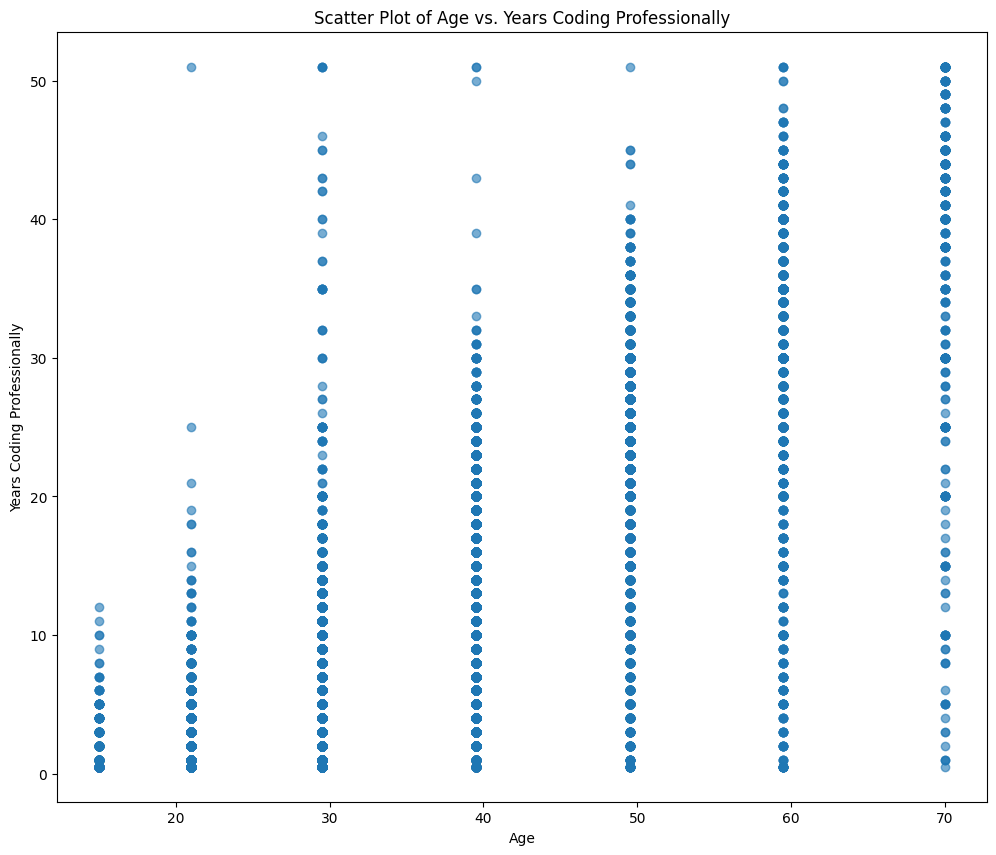

In [13]:
years_code_mapping = {
    "Less than 1 year": 0.5,
    "More than 50 years": 51
} 

df['YearsCodePro_Numeric'] = df['YearsCodePro'].replace(years_code_mapping) 

df['YearsCodePro_Numeric'] = pd.to_numeric(df['YearsCodePro_Numeric'], errors = 'coerce')

df_filtered_3 = df[['Age_Numeric','YearsCodePro_Numeric']].dropna() 

plt.figure(figsize = (12,10)) 
plt.scatter(df_filtered_3['Age_Numeric'], df_filtered_3['YearsCodePro_Numeric'], alpha = 0.6) 

plt.xlabel("Age") 
plt.ylabel("Years Coding Professionally") 
plt.title("Scatter Plot of Age vs. Years Coding Professionally") 
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


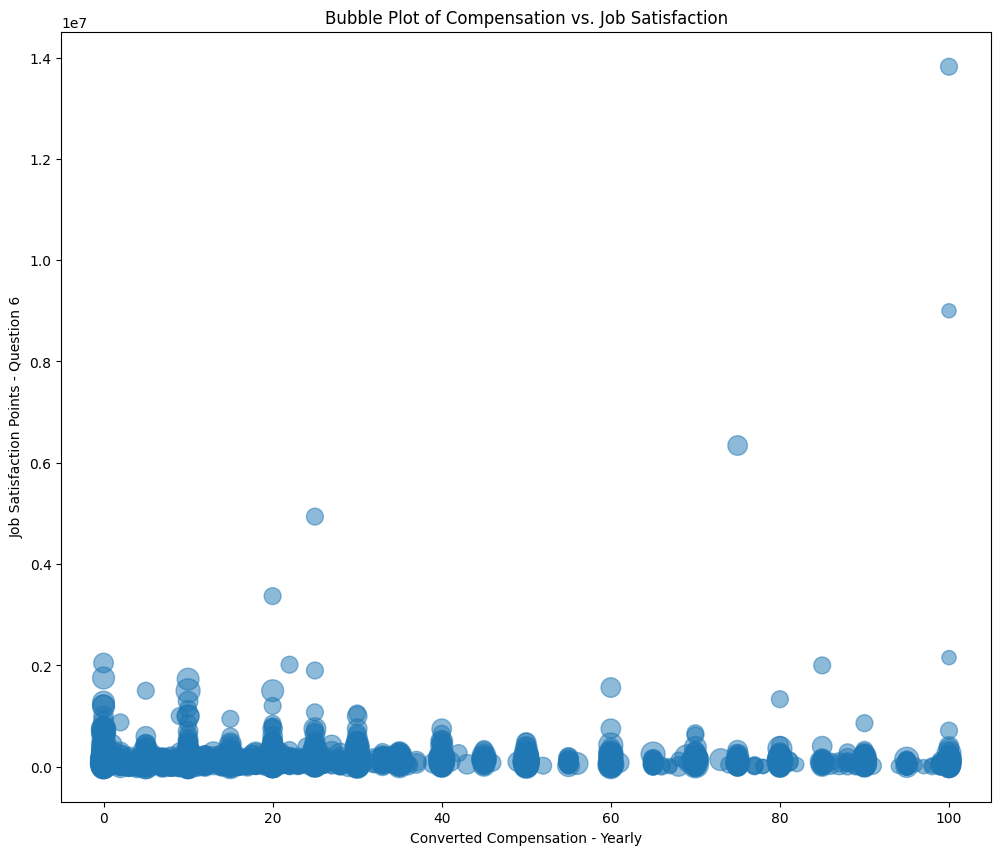

In [15]:
plt.figure(figsize = (12,10)) 
plt.scatter(df['JobSatPoints_6'], df['ConvertedCompYearly'],
            s = df['Age_Numeric'] * 5, 
            alpha = 0.5) 

plt.xlabel("Converted Compensation - Yearly")
plt.ylabel("Job Satisfaction Points - Question 6") 
plt.title("Bubble Plot of Compensation vs. Job Satisfaction") 
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


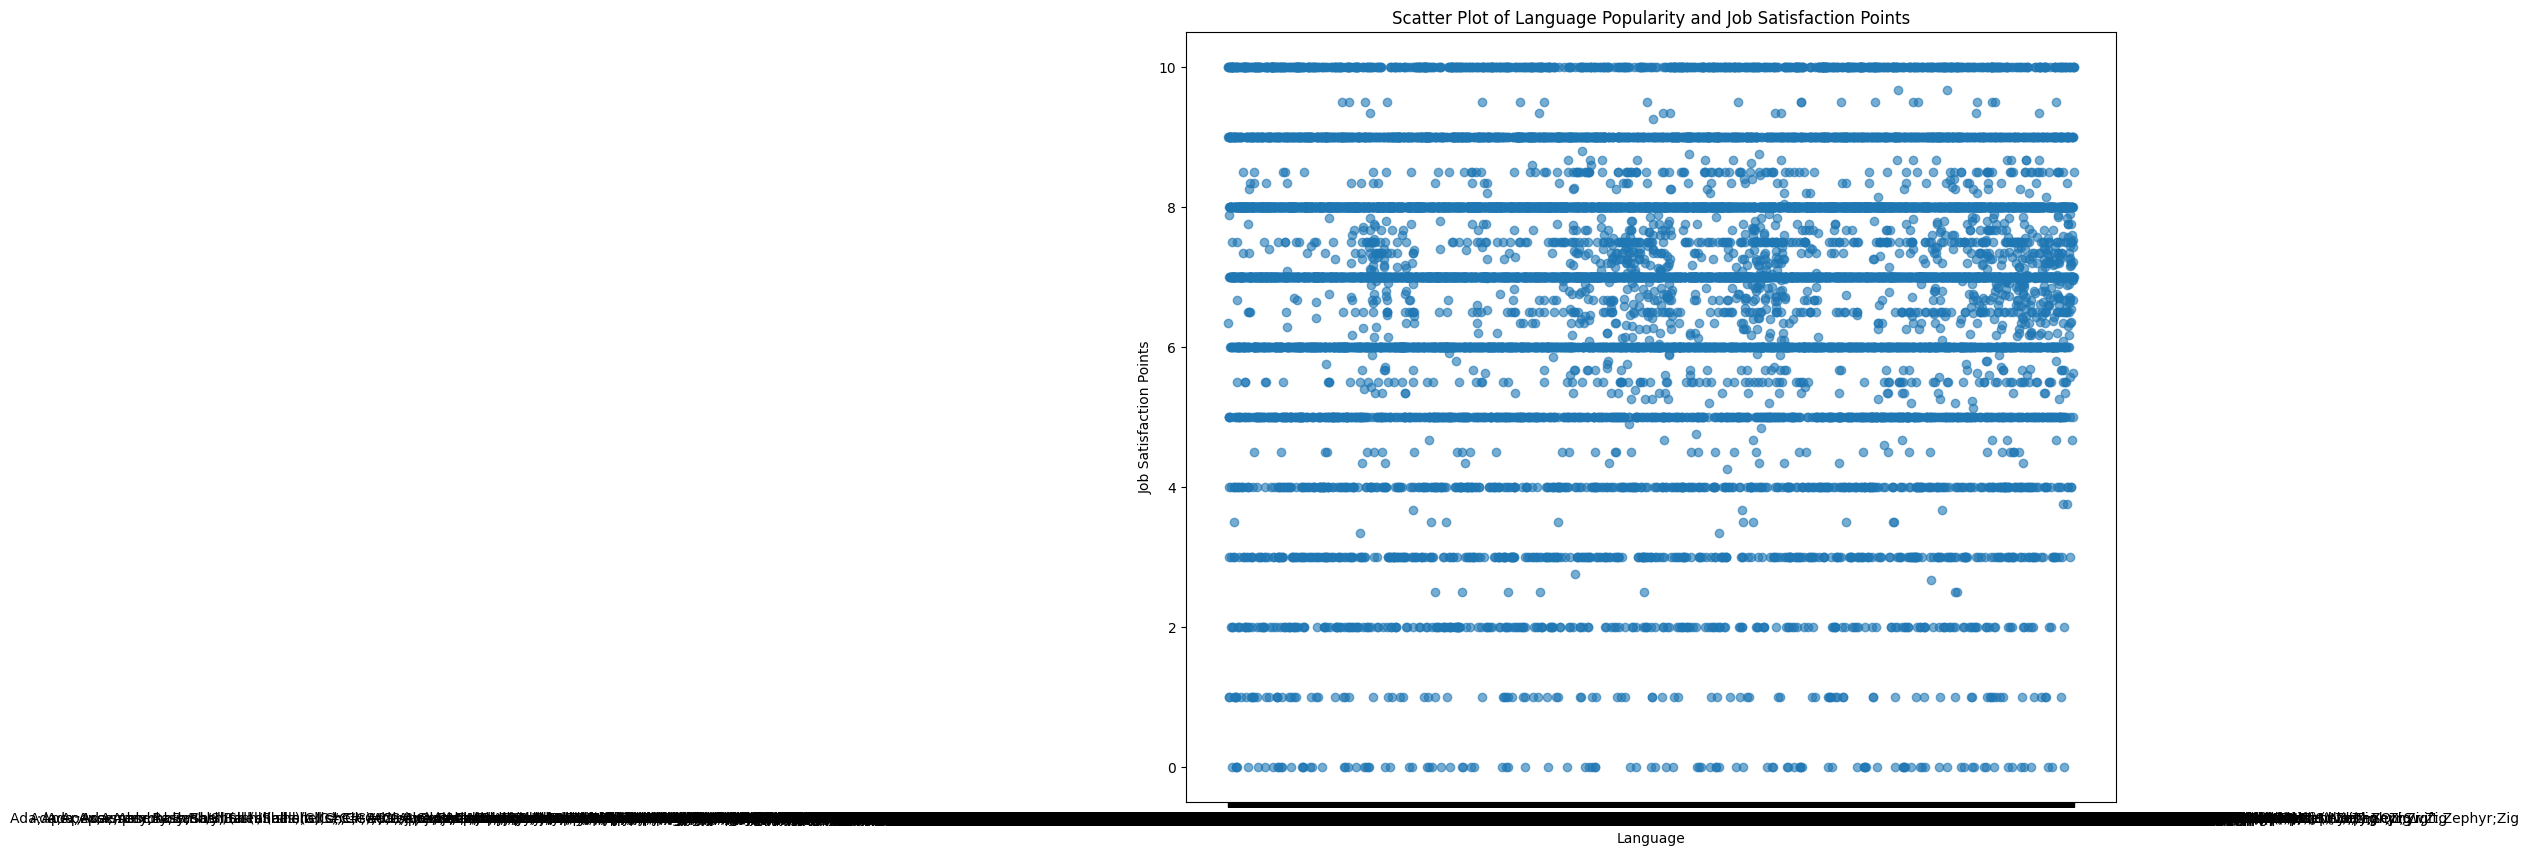

In [22]:
df_languages =  df[['LanguageHaveWorkedWith', 'JobSat']].dropna()

df_languages = df_languages.assign(Language = df_languages['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

df_lang_satisfaction = df_languages.groupby('LanguageHaveWorkedWith')['JobSat'].mean().reset_index()

plt.figure(figsize = (12,10)) 
plt.scatter(df_lang_satisfaction['LanguageHaveWorkedWith'], df_lang_satisfaction['JobSat'], alpha = 0.6)

plt.xlabel("Language") 
plt.ylabel("Job Satisfaction Points") 
plt.title("Scatter Plot of Language Popularity and Job Satisfaction Points")
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


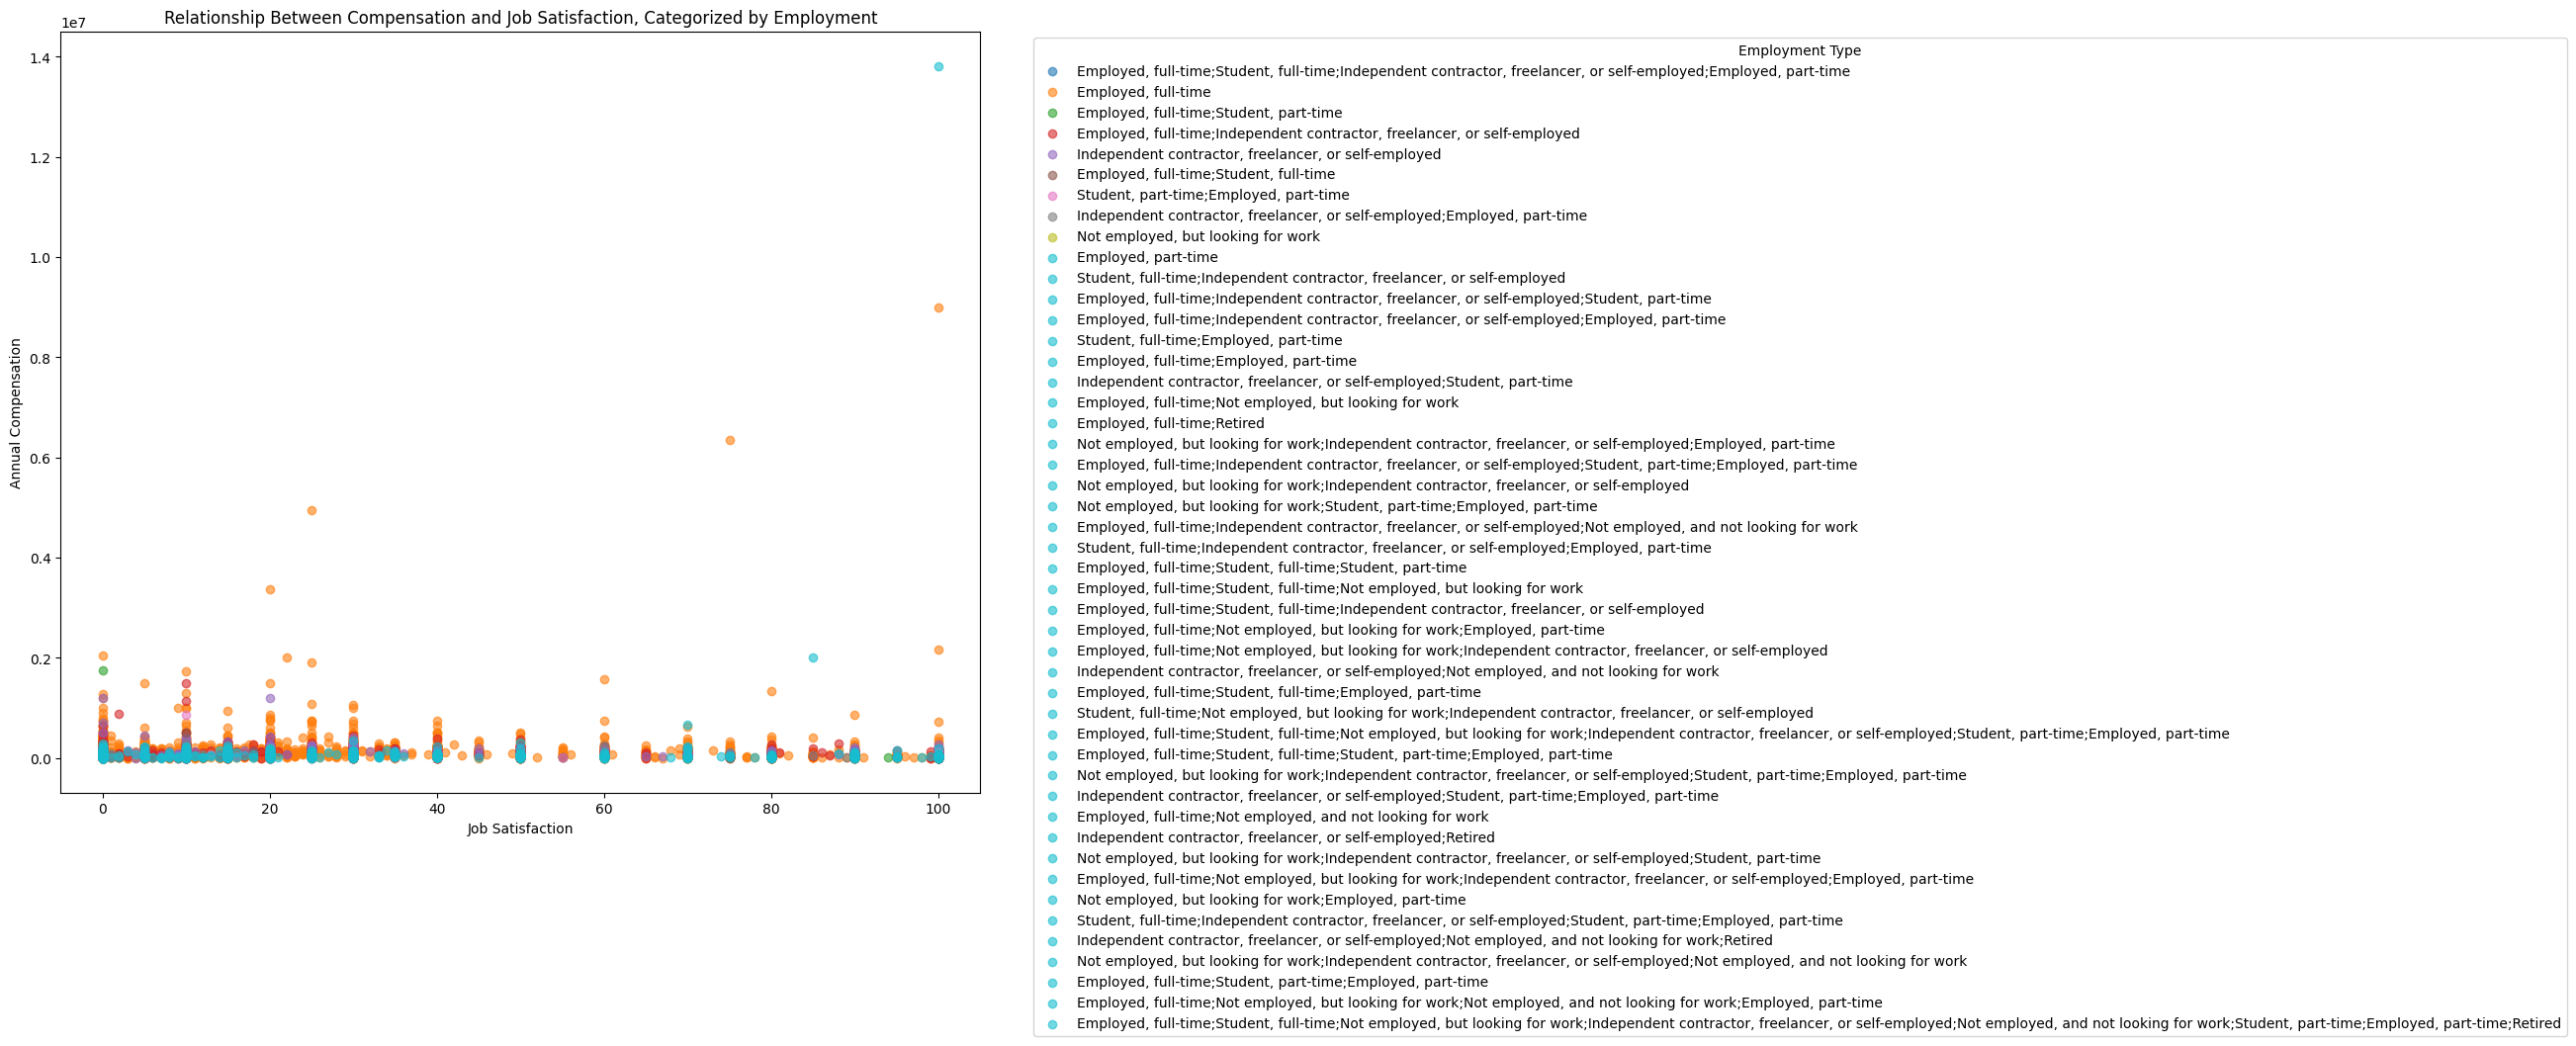

In [25]:
df_filtered_4 = df[['ConvertedCompYearly','JobSatPoints_6','Employment']].dropna() 

employment_types = df_filtered_4['Employment'].unique() 
colors = plt.cm.tab10(range(len(employment_types))) 

plt.figure(figsize = (12,10)) 

for emp_type, color in zip(employment_types, colors):
    subset = df_filtered_4[df_filtered_4['Employment'] == emp_type]
    plt.scatter(subset['JobSatPoints_6'], subset['ConvertedCompYearly'], label = emp_type, alpha = 0.6, color = color) 

plt.xlabel("Job Satisfaction") 
plt.ylabel("Annual Compensation") 
plt.title("Relationship Between Compensation and Job Satisfaction, Categorized by Employment") 
plt.legend(title = "Employment Type", bbox_to_anchor = (1.05, 1), loc = 'best') 

plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


In [ ]:
df_filtered_5 = df[['YearsCodePro_Numeric', 'Age_Numeric', 'Country']].dropna() 

unique_countries = df_filtered_5['Country'].unique() 
colors = sns.color_palette("husl", len(unique_countries)) 

plt.figure(figsize = (12,10)) 

for country, color in zip(unique_countries, colors):
    subset = df_filtered_5[df_filtered_5['Country'] == country] 
    plt.scatter(subset['Age_Numeric'], subset['YearsCodePro_Numeric'], label = country, alpha = 0.6, color = color) 

plt.xlabel("Age") 
plt.ylabel("Years of Professional Coding Experience") 
plt.title("Scatter Plot for Work Experience vs. Age by Country") 
plt.legend(title = "Country", bbox_to_anchor = (1.05, 1), loc = "best")
plt.show() 

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
